In [114]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
plt.style.use('fivethirtyeight')
from fri import plot_dendrogram_and_intervals
from fri import plot

%matplotlib inline
from fri import genClassificationData
#X,y = genClassificationData(n_samples=200, n_features=20,n_strel=4, n_redundant=8,
#                    n_repeated=0, flip_y=0,random_state=2,partition=[4,4])

X,y =  genClassificationData(n_samples=200, n_features=5,n_strel=2, n_redundant=0,
                    n_repeated=0, flip_y=0,random_state=3)

Generating dataset with d=5,n=200,strongly=2,weakly=0, partition of weakly=None


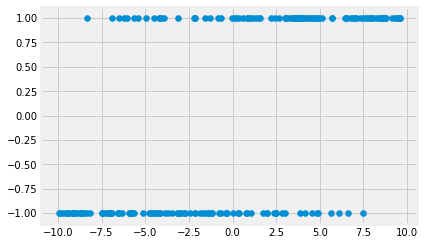

In [115]:
plt.scatter(X[:,0],y)

In [116]:
rel = X[:,0].copy()

In [117]:
n = len(X)
s1 = np.zeros(n)
s2 = np.zeros(n)

In [118]:
half = int(n/2)

In [119]:
s1[:half] = X[:half,0]

In [120]:
s2[half:] = X[half:,0]

In [122]:
X[:,2] = s1
X[:,3] = s2

In [123]:
X.shape

(200, 5)

We created a binary classification set with 6 features of which 2 are strongly relevant and 2 weakly relevant.

Scale Data

In [124]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

New object for Classification Data

In [138]:
from fri import FRIClassification
fri = FRIClassification(optimum_deviation=0.2)

Fit to data

In [139]:
fri.fit(X_scaled,y)

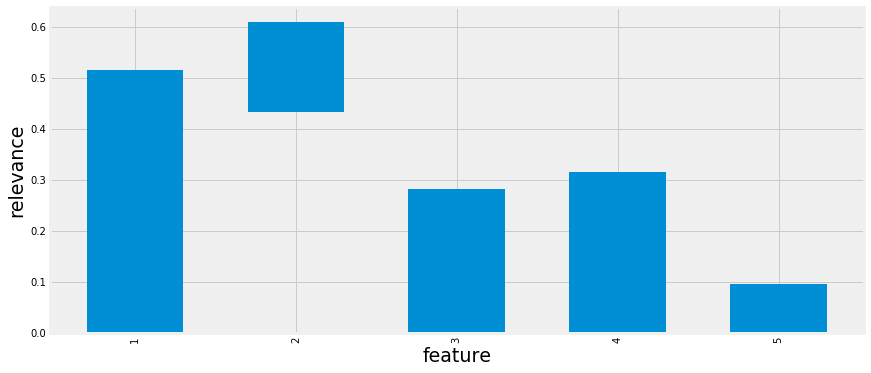

In [140]:

p = plot.plotIntervals(fri.interval_)

In [141]:
fri.interval_

array([[ 0.        ,  0.51517855],
       [ 0.43306463,  0.60879314],
       [ 0.        ,  0.28262294],
       [ 0.        ,  0.31507698],
       [ 0.        ,  0.09507535]])

# New community detection using  constrained problems

In [142]:
clust, link, dist_mat = fri.community_detection2(X_scaled,y)

In [143]:
clust

array([1, 2, 1, 1, 3], dtype=int32)

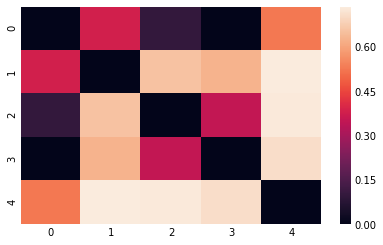

In [144]:
sns.heatmap(dist_mat)

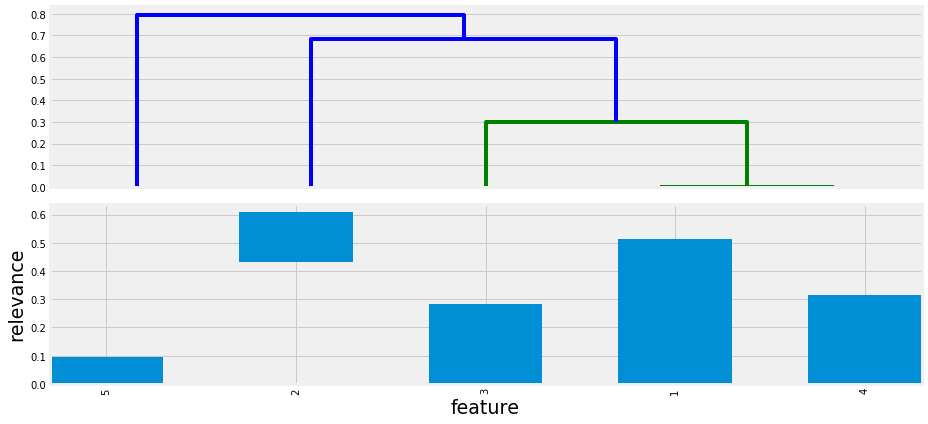

In [145]:
p = plot_dendrogram_and_intervals(fri.interval_,link)

# Old community detection using differnce between optimal solution and unconstrained problem

In [146]:
clust, link, dist_mat = fri.community_detection()

In [147]:
clust

array([1, 2, 1, 1, 3], dtype=int32)

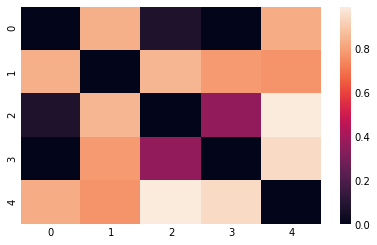

In [148]:
sns.heatmap(dist_mat)

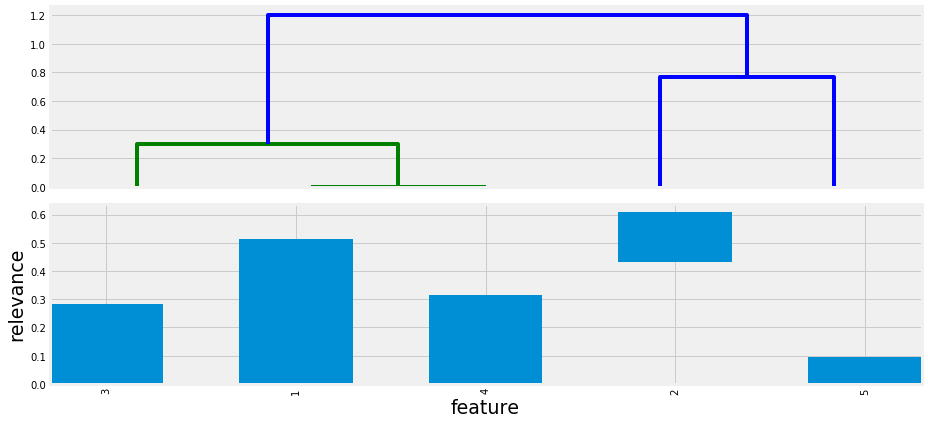

In [149]:
p = plot_dendrogram_and_intervals(fri.interval_,link)

# Simple Correlation 

/home/lpfannschmidt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # This is added back by InteractiveShellApp.init_path()


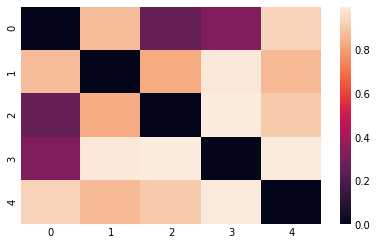

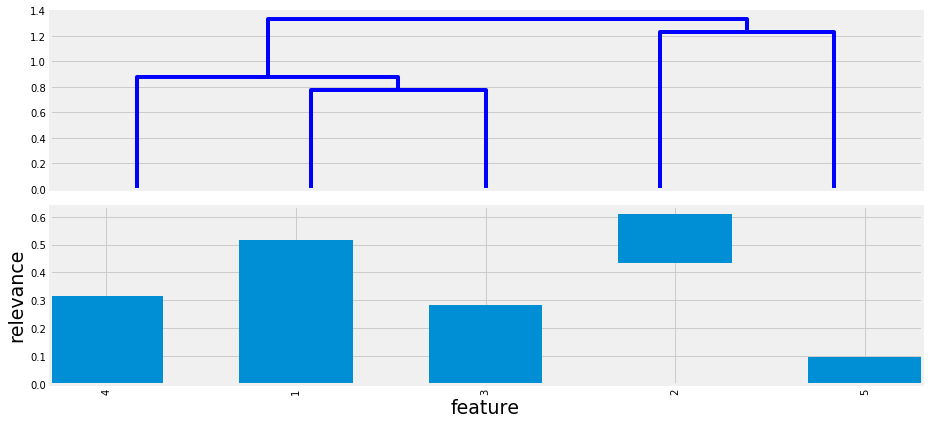

In [150]:
import pandas as pd
corr_pd = pd.DataFrame(X_scaled).corr()

corr_pd = 1-corr_pd.abs()
corr_pd = corr_pd.values

sns.heatmap(corr_pd)

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
z = linkage(corr_pd,method="single")
threshold = 0.55*np.max(z[:, 2])
p = plot.plot_dendrogram_and_intervals(fri.interval_,z)

In [151]:
 pd.DataFrame(X_scaled).corr()

,0,1,2,3,4
0,1.000000,0.125008,0.735696,0.678139,-0.064520
1,0.125008,1.000000,0.165026,0.005500,-0.132137
2,0.735696,0.165026,1.000000,0.001124,-0.089708
3,0.678139,0.005500,0.001124,1.000000,0.002081
4,-0.064520,-0.132137,-0.089708,0.002081,1.000000
